In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Netflix Dataset.csv')


In [5]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['Category', 'Title', 'Type', 'Release_Date'], inplace=True)

In [6]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)
df['Release_Year'] = df['Release_Date'].dt.year

In [7]:
df = df.assign(Genre=df['Type'].str.split(', ')).explode('Genre')

In [8]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

/tmp/ipython-input-4012150106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts.head(15), x='Count', y='Genre', palette='viridis')


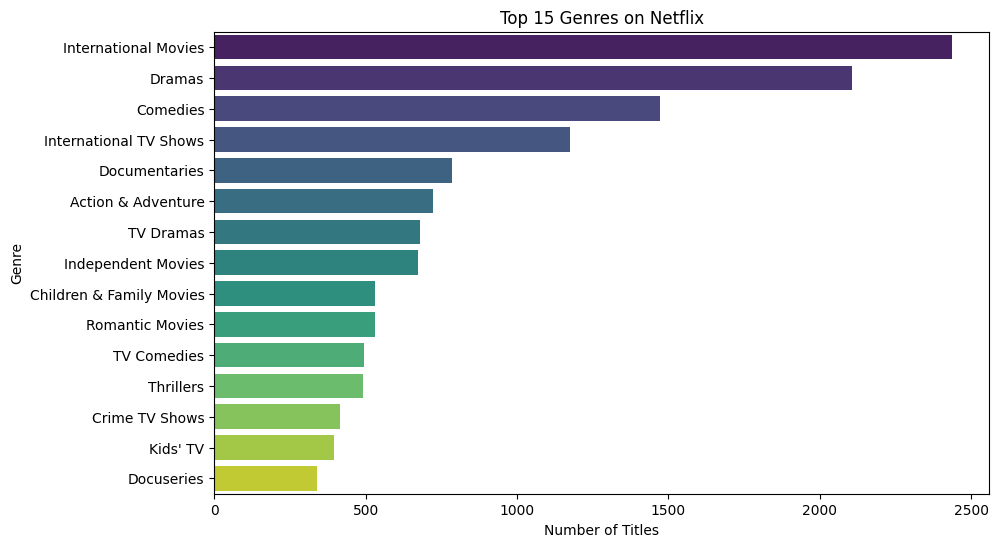

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data=genre_counts.head(15), x='Count', y='Genre', palette='viridis')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [10]:
mean_count = genre_counts['Count'].mean()
overrepresented = genre_counts[genre_counts['Count'] > mean_count]
underrepresented = genre_counts[genre_counts['Count'] < mean_count]

print("🎬 Overrepresented Genres:\n", overrepresented)
print("\n🎭 Underrepresented Genres:\n", underrepresented)

🎬 Overrepresented Genres:
                        Genre  Count
0       International Movies   2437
1                     Dramas   2106
2                   Comedies   1471
3     International TV Shows   1176
4              Documentaries    786
5         Action & Adventure    721
6                  TV Dramas    680
7         Independent Movies    673
8   Children & Family Movies    532
9            Romantic Movies    531
10               TV Comedies    494
11                 Thrillers    491
12            Crime TV Shows    416

🎭 Underrepresented Genres:
                            Genre  Count
13                      Kids' TV    396
14                    Docuseries    338
15               Stand-Up Comedy    329
16             Romantic TV Shows    327
17              Music & Musicals    321
18                 Horror Movies    312
19              Sci-Fi & Fantasy    218
20              British TV Shows    214
21                    Reality TV    211
22                 Sports Movies    196


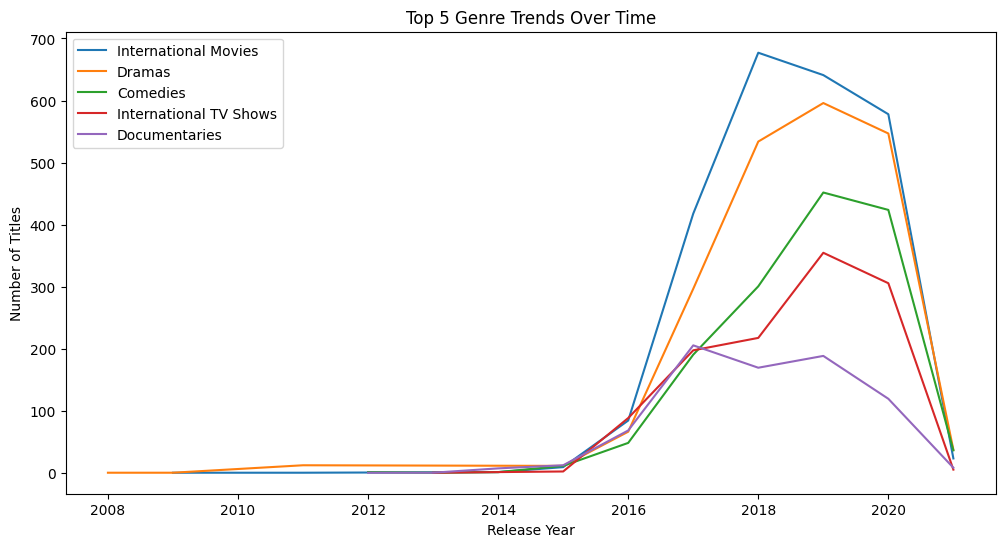

In [11]:
genre_trends = df.groupby(['Release_Year', 'Genre']).size().reset_index(name='Count')

top_genres = genre_counts.head(5)['Genre']
plt.figure(figsize=(12,6))
for genre in top_genres:
    data = genre_trends[genre_trends['Genre'] == genre]
    plt.plot(data['Release_Year'], data['Count'], label=genre)

plt.title('Top 5 Genre Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

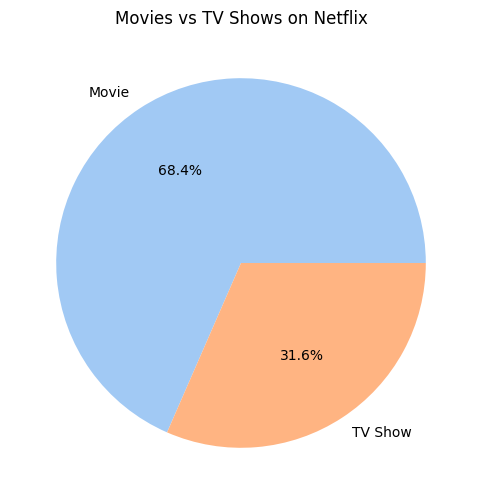

In [12]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Movies vs TV Shows on Netflix')
plt.show()

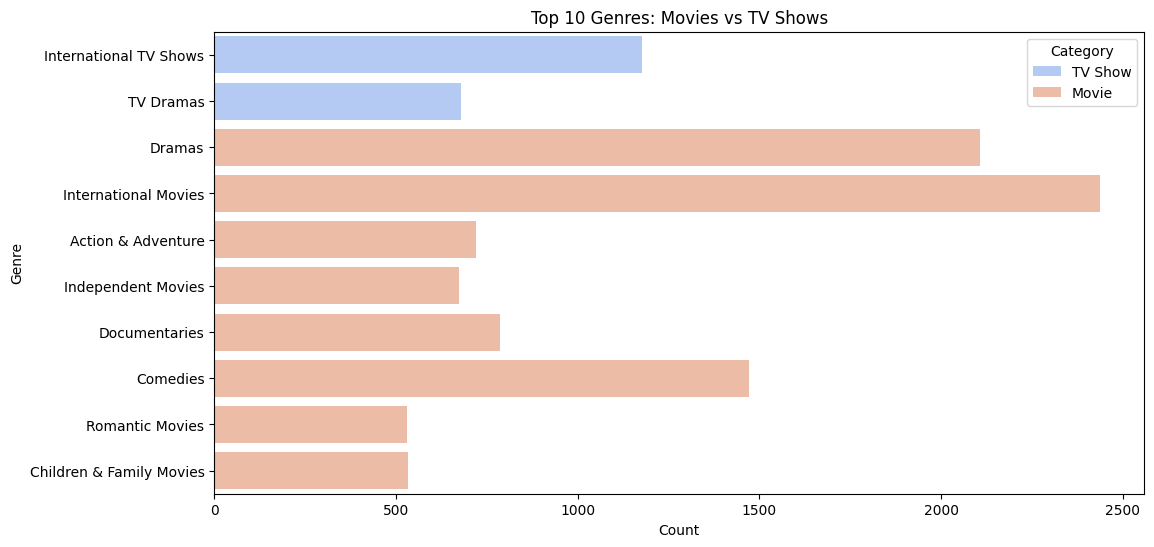

In [13]:
plt.figure(figsize=(12,6))
top10_genres = df['Genre'].value_counts().head(10).index
subset = df[df['Genre'].isin(top10_genres)]
sns.countplot(data=subset, y='Genre', hue='Category', palette='coolwarm')
plt.title('Top 10 Genres: Movies vs TV Shows')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend(title='Category')
plt.show()

/tmp/ipython-input-2046240765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


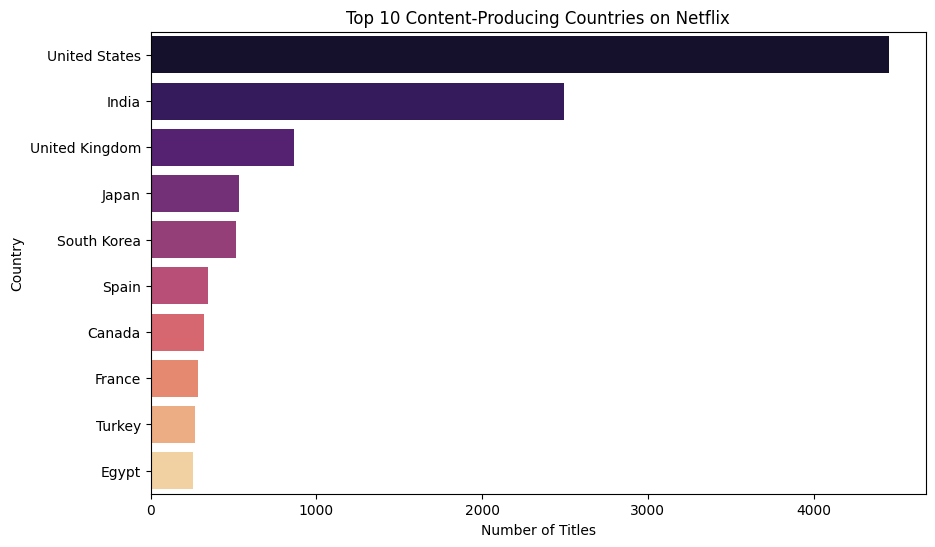

In [16]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

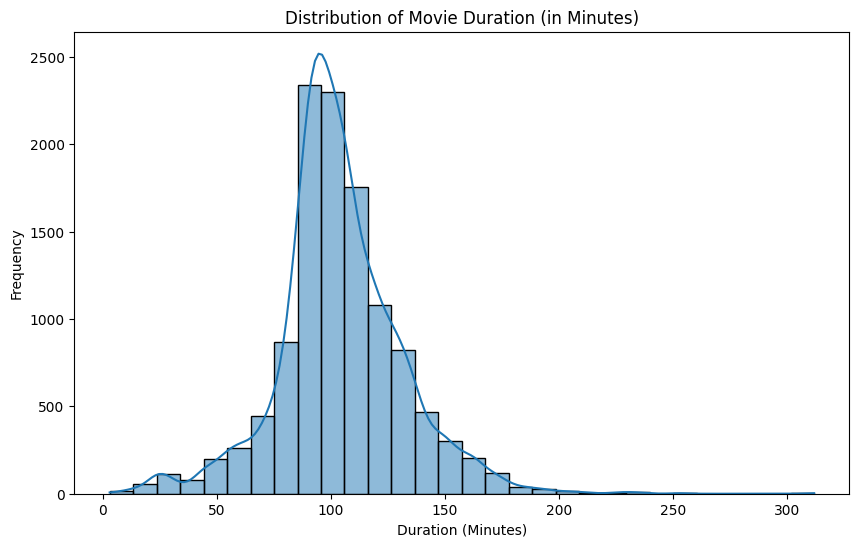

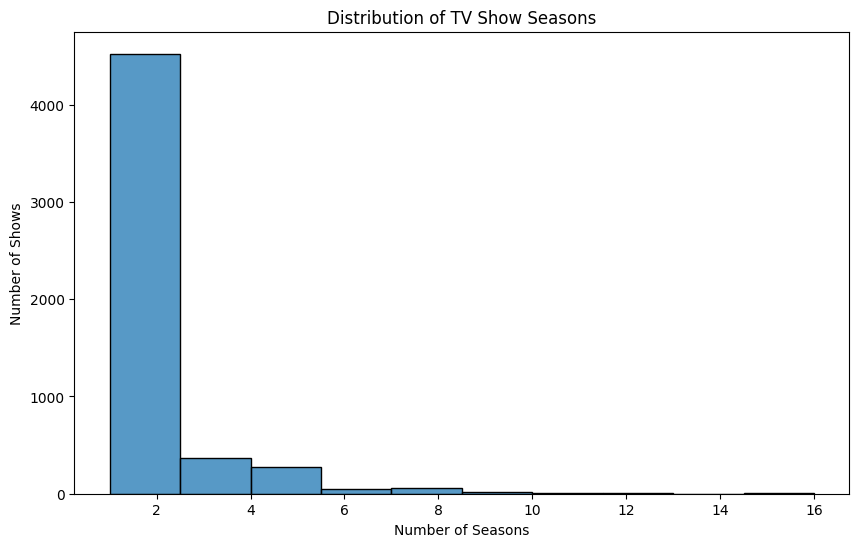

In [20]:
# --- 1️⃣1️⃣ Duration Analysis (Fixed) ---
# Separate durations for movies and TV shows safely
movies = df[df['Category'] == 'Movie'].copy()
shows = df[df['Category'] == 'TV Show'].copy()

movies.loc[:, 'Duration_Minutes'] = (
    movies['Duration'].str.replace(' min', '', regex=False).astype(float)
)

shows.loc[:, 'Seasons'] = (
    shows['Duration']
    .str.replace(' Season', '', regex=False)
    .str.replace('s', '', regex=False)
    .astype(float)
)

# Plot movie duration distribution
plt.figure(figsize=(10,6))
sns.histplot(movies['Duration_Minutes'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Duration (in Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot TV show season distribution
plt.figure(figsize=(10,6))
sns.histplot(shows['Seasons'].dropna(), bins=10, kde=False)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Shows')
plt.show()
